In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [4]:
df1 = pd.read_csv('1.gt_bitcoin.csv', usecols=[2], skiprows=2, names=['1.gt_bitcoin'])
df2 = pd.read_csv('2.gt_Buy_Bitcoin.csv', usecols=[2], skiprows=2, names=['2.gt_Buy_Bitcoin'])
df3 = pd.read_csv('3.gt_Sell_Bitcoin.csv', usecols=[2], skiprows=2, names=['3.gt_Sell_Bitcoin'])
df4 = pd.read_csv('4.gt_ethereum.csv', usecols=[2], skiprows=2, names=['4.gt_ethereum'])
df5 = pd.read_csv('5.gt_Ukraine_war.csv', usecols=[2], skiprows=2, names=['5.gt_Ukraine_war'])
df6 = pd.read_csv('6.gt_covid.csv', usecols=[2], skiprows=2, names=['6.gt_covid'])
df7 = pd.read_csv('7.s&p_twitter.csv', usecols=[2], skiprows=2, names=['7.s&p_twitter'])
df8 = pd.read_csv('8.CBDC_uncertainty.csv', usecols=[2], skiprows=2, names=['8.CBDC_uncertainty'])
df9 = pd.read_csv('9.CBDC_atten.csv', usecols=[2], skiprows=2, names=['9.CBDC_atten'])
df10 = pd.read_csv('10.news_senti.csv', usecols=[2], skiprows=2, names=['10.news_senti'])
df11 = pd.read_csv('11.fear&greed.csv', usecols=[2], skiprows=2, names=['11.fear&greed'])
df12 = pd.read_csv('12.tweets_pos.csv', usecols=[2], skiprows=2, names=['12.tweets_pos'])
df13 = pd.read_csv('13.tweets_neg.csv', usecols=[2], skiprows=2, names=['13.tweets_neg'])
df14 = pd.read_csv('14.twitter_btccrash_pos.csv', usecols=[2], skiprows=2, names=['14.twitter_btccrash_pos'])
df15 = pd.read_csv('15.twitter_btccrash_neg.csv', usecols=[2], skiprows=2, names=['15.twitter_btccrash_neg'])

In [6]:
df_concat = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], axis=1)
df_remove = df_concat.drop(['2.gt_Buy_Bitcoin', '3.gt_Sell_Bitcoin', '8.CBDC_uncertainty'], axis=1)
# replace "inf" with NaN
df_remove = df_remove.replace('inf', 0)
df_remove = df_remove.replace([np.inf, -np.inf], 0)
df_na = df_remove.fillna(0)
df_na

,1.gt_bitcoin,4.gt_ethereum,5.gt_Ukraine_war,6.gt_covid,7.s&p_twitter,9.CBDC_atten,10.news_senti,11.fear&greed,12.tweets_pos,13.tweets_neg,14.twitter_btccrash_pos,15.twitter_btccrash_neg
0,-0.004854,-0.011494,0.000000,0.0,0.006039,0.000321,-0.095687,0.236842,-0.113559,0.514869,-0.138386,0.120306
1,-0.004878,-0.011628,0.000000,0.0,0.003468,-0.000248,-0.097991,0.191489,0.036830,-0.234322,-0.265998,0.381993
2,-0.004902,-0.011765,0.000000,0.0,0.003456,-0.000248,-0.078837,-0.214286,0.063410,0.100377,0.194764,-0.005493
3,0.019704,-0.011905,0.000000,0.0,0.003445,-0.000248,-0.079216,0.250000,-0.097288,-0.182443,-0.223062,-0.145083
4,0.019324,-0.012048,0.000000,0.0,0.001584,-0.000248,-0.051206,0.072727,-0.214515,0.211336,0.090925,0.367505
...,...,...,...,...,...,...,...,...,...,...,...,...
1760,-0.015873,0.142857,-0.011905,0.0,0.000146,-0.000637,-0.202782,-0.034483,-0.192200,0.144226,-0.319385,-0.168254
1761,-0.016129,0.125000,-0.012048,0.0,0.000146,-0.000638,-0.011448,-0.035714,0.172758,0.098971,-0.287368,0.329540
1762,-0.016393,0.111111,-0.012195,0.0,-0.010970,-0.000638,-0.103914,0.037037,-0.127630,0.026982,-0.067539,0.101123
1763,-0.016667,0.100000,-0.012346,0.0,0.013389,-0.000639,-0.064228,0.000000,0.165572,-0.055837,0.233303,-0.110677


In [7]:
bitcoin = pd.read_csv('bitcoin.csv', usecols=[5], skiprows=2, names=['bitcoin'])
ether = pd.read_csv('ethereum.csv', usecols=[5], skiprows=2, names=['ether'])
BDM_exlarge = pd.read_csv('SP_BDM_exlarge.csv', usecols=[5], skiprows=2, names=['BDM_exlarge'])
BDM = pd.read_csv('SP_BDM.csv', usecols=[5], skiprows=2, names=['BDM'])

# control
Russell2000 = pd.read_csv('Russell2000.csv', usecols=[2], skiprows=2, names=['Russell2000'])
VIX = pd.read_csv('VIX.csv', usecols=[2], skiprows=2, names=['VIX'])
df_control = pd.concat([df_na,Russell2000,VIX], axis=1)

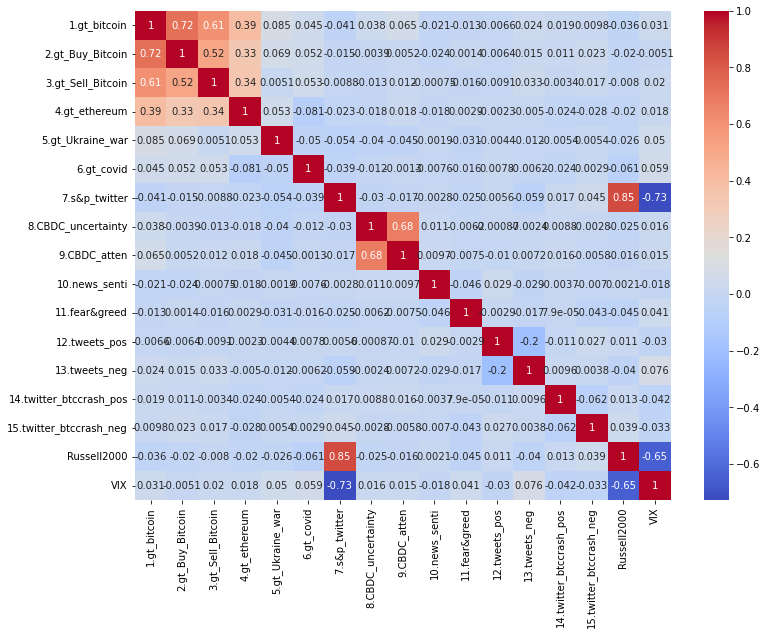

In [8]:
df_concat_all = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], axis=1)
# replace "inf" with NaN
df_remove_all = df_concat_all.replace('inf', 0)
df_remove_all = df_concat_all.replace([np.inf, -np.inf], 0)
df_na_all = df_remove_all .fillna(0)
df_na_all

df_control_all = pd.concat([df_na_all,Russell2000,VIX], axis=1)
# compute correlation matrix
corr_matrix_all = df_control_all.corr()

# Plot the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix_all, cmap='coolwarm', annot=True, ax=ax)

# show the plot
plt.show()

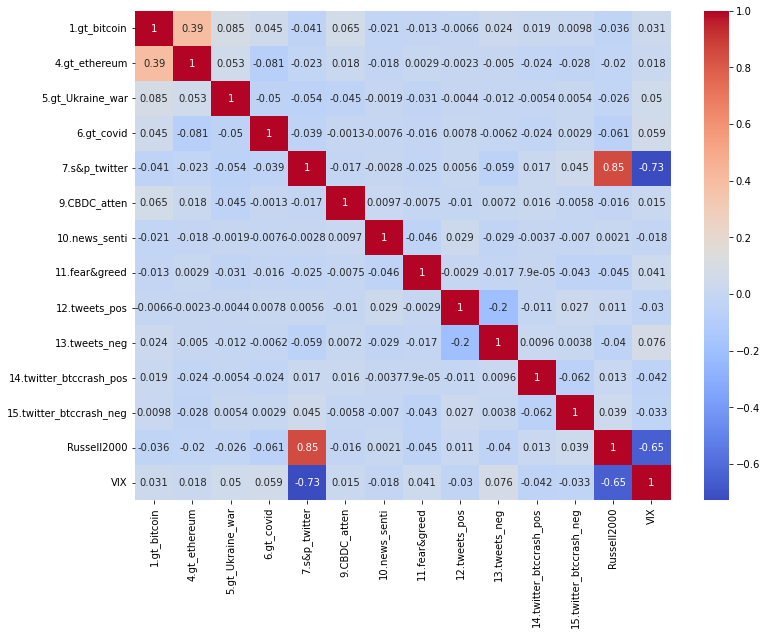

In [6]:
# compute correlation matrix
corr_matrix = df_control.corr()

# Plot the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

# show the plot
plt.show()

# 1. Bitcoin

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.669438
         Iterations 5


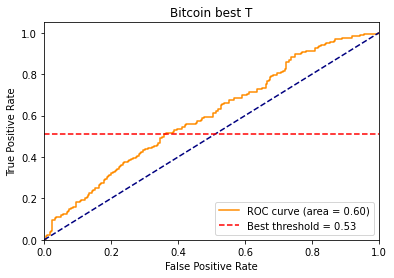

In [8]:
bitcoin_control = pd.concat([bitcoin,df_control], axis=1)
train, test = train_test_split(bitcoin_control, test_size = 0.3)
x_train = train.iloc[0:,1:15]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:15]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
# predict probabilities for the test set
y_prob = result.predict(x_test)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# find the best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)]

# plot ROC curve and mark best threshold
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [tpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)]], color='red', linestyle='--', label='Best threshold = %0.2f' % best_threshold)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bitcoin best T')
plt.legend(loc="lower right")
plt.show()

In [9]:
# use the best threshold to make binary predictions
y_pred = (y_prob >= best_threshold).astype(int)
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# print accuracy and confusion matrix
print('Accuracy:', accuracy)
print('best_threshold:',best_threshold)
print('Confusion matrix:')
print(conf_matrix)
result.summary()

Accuracy: 0.5735849056603773
best_threshold: 0.5347479796143663
Confusion matrix:
[[162  90]
 [136 142]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                bitcoin   No. Observations:                 1235
Model:                          Logit   Df Residuals:                     1220
Method:                           MLE   Df Model:                           14
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.03351
Time:                        00:31:26   Log-Likelihood:                -826.76
converged:                       True   LL-Null:                       -855.42
Covariance Type:            nonrobust   LLR p-value:                 3.429e-07
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0823      0.061      1.345      0.179      -0.038       0.202
1.gt_bitcoin                1.0946      1.896      0.577      0.564      -2.622       4.811
4.gt_ethereum               0.1721      1.140      0.151      0.880      -2.062       2.406
5.gt_Ukraine_war            0.0766      0.565      0.136      0.892      -1.031       1.184
6.gt_covid                 -1.9925      1.760     -1.132      0.258      -5.442       1.457
7.s&p_twitter               1.6633     12.668      0.131      0.896     -23.166      26.493
9.CBDC_atten               79.2459     78.303      1.012      0.312     -74.225     232.717
10.news_senti               0.0054      0.062      0.087      0.931      -0.115       0.126
11.fear&greed               0.0926      0.221      0.420      0.675      -0.340       0.525
12.tweets_pos               0.1394      0.432      0.323      0.747      -0.707       0.986
13.tweets_neg              -0.9443      0.251     -3.761      0.000      -1.436      -0.452
14.twitter_btccrash_pos     0.0017      0.036      0.047      0.962      -0.069       0.073
15.twitter_btccrash_neg     0.0207      0.083      0.250      0.802      -0.142       0.183
Russell2000                20.8344      8.672      2.403      0.016       3.838      37.831
VIX                        -1.9486      1.522     -1.280      0.201      -4.933       1.035
===========================================================================================
"""

# 2. Ether

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.658859
         Iterations 8


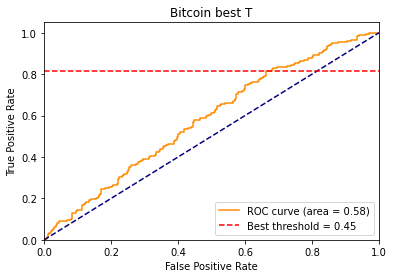

In [10]:
ether_control = pd.concat([ether,df_control], axis=1)
train, test = train_test_split(ether_control, test_size = 0.3)
x_train = train.iloc[0:,1:15]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:15]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
# predict probabilities for the test set
y_prob = result.predict(x_test)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# find the best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)]

# plot ROC curve and mark best threshold
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [tpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)]], color='red', linestyle='--', label='Best threshold = %0.2f' % best_threshold)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bitcoin best T')
plt.legend(loc="lower right")
plt.show()

In [11]:
# use the best threshold to make binary predictions
y_pred = (y_prob >= best_threshold).astype(int)
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# print accuracy and confusion matrix
print('Accuracy:', accuracy)
print('best_threshold:',best_threshold)
print('Confusion matrix:')
print(conf_matrix)
result.summary()

Accuracy: 0.5773584905660377
best_threshold: 0.44933878695910795
Confusion matrix:
[[ 89 174]
 [ 50 217]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  ether   No. Observations:                 1235
Model:                          Logit   Df Residuals:                     1220
Method:                           MLE   Df Model:                           14
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.04898
Time:                        00:32:32   Log-Likelihood:                -813.69
converged:                       True   LL-Null:                       -855.60
Covariance Type:            nonrobust   LLR p-value:                 5.527e-12
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0861      0.062      1.396      0.163      -0.035       0.207
1.gt_bitcoin                1.0300      1.885      0.546      0.585      -2.664       4.724
4.gt_ethereum               1.4179      1.201      1.181      0.238      -0.936       3.772
5.gt_Ukraine_war            1.0982      0.713      1.541      0.123      -0.299       2.495
6.gt_covid                  0.9405      1.956      0.481      0.631      -2.893       4.774
7.s&p_twitter              28.1152     14.064      1.999      0.046       0.551      55.679
9.CBDC_atten              136.4069     73.457      1.857      0.063      -7.566     280.380
10.news_senti              -0.0026      0.006     -0.445      0.657      -0.014       0.009
11.fear&greed               0.0192      0.237      0.081      0.935      -0.445       0.484
12.tweets_pos              -0.0705      0.445     -0.158      0.874      -0.944       0.803
13.tweets_neg              -1.2324      0.264     -4.661      0.000      -1.751      -0.714
14.twitter_btccrash_pos    -0.0055      0.025     -0.219      0.827      -0.055       0.044
15.twitter_btccrash_neg    -0.1045      0.084     -1.251      0.211      -0.268       0.059
Russell2000                 9.5998      8.889      1.080      0.280      -7.822      27.022
VIX                        -1.0519      1.588     -0.663      0.508      -4.164       2.060
===========================================================================================
"""

# 3. BDM_exlarge

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.661639
         Iterations 10


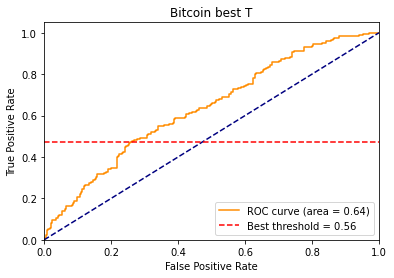

In [12]:
BDM_exlarge_control = pd.concat([BDM_exlarge,df_control], axis=1)
train, test = train_test_split(BDM_exlarge_control, test_size = 0.3)
x_train = train.iloc[0:,1:15]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:15]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
# predict probabilities for the test set
y_prob = result.predict(x_test)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# find the best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)]

# plot ROC curve and mark best threshold
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [tpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)]], color='red', linestyle='--', label='Best threshold = %0.2f' % best_threshold)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bitcoin best T')
plt.legend(loc="lower right")
plt.show()

In [13]:
# use the best threshold to make binary predictions
y_pred = (y_prob >= best_threshold).astype(int)
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# print accuracy and confusion matrix
print('Accuracy:', accuracy)
print('best_threshold:',best_threshold)
print('Confusion matrix:')
print(conf_matrix)
result.summary()

Accuracy: 0.5981132075471698
best_threshold: 0.5648123381835384
Confusion matrix:
[[182  63]
 [150 135]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            BDM_exlarge   No. Observations:                 1235
Model:                          Logit   Df Residuals:                     1220
Method:                           MLE   Df Model:                           14
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.04186
Time:                        00:33:22   Log-Likelihood:                -817.12
converged:                       True   LL-Null:                       -852.83
Covariance Type:            nonrobust   LLR p-value:                 1.072e-09
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1413      0.061      2.309      0.021       0.021       0.261
1.gt_bitcoin               -3.8746      1.879     -2.062      0.039      -7.558      -0.191
4.gt_ethereum               2.4914      1.167      2.135      0.033       0.204       4.779
5.gt_Ukraine_war           -0.0389      0.560     -0.069      0.945      -1.137       1.059
6.gt_covid                  1.5380      1.588      0.969      0.333      -1.574       4.650
7.s&p_twitter              10.5154     13.988      0.752      0.452     -16.901      37.932
9.CBDC_atten              -41.5361     74.121     -0.560      0.575    -186.811     103.739
10.news_senti              -0.0354      0.049     -0.720      0.471      -0.132       0.061
11.fear&greed               0.6967      0.265      2.629      0.009       0.177       1.216
12.tweets_pos               0.0104      0.423      0.025      0.980      -0.819       0.840
13.tweets_neg              -0.5398      0.251     -2.146      0.032      -1.033      -0.047
14.twitter_btccrash_pos    -0.0124      0.027     -0.465      0.642      -0.064       0.040
15.twitter_btccrash_neg    -0.0507      0.102     -0.495      0.620      -0.251       0.150
Russell2000                22.0944      9.273      2.383      0.017       3.920      40.269
VIX                        -1.2936      1.544     -0.838      0.402      -4.321       1.734
===========================================================================================
"""

# 4. BDM

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.645162
         Iterations 11


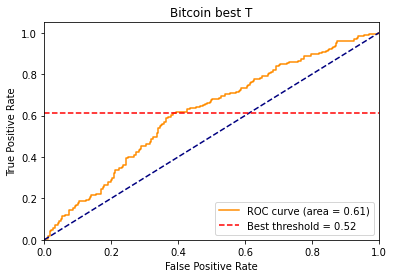

In [14]:
BDM_control = pd.concat([BDM,df_control], axis=1)
train, test = train_test_split(BDM_control, test_size = 0.3)
x_train = train.iloc[0:,1:15]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:15]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
# predict probabilities for the test set
y_prob = result.predict(x_test)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# find the best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)]

# plot ROC curve and mark best threshold
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [tpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)]], color='red', linestyle='--', label='Best threshold = %0.2f' % best_threshold)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bitcoin best T')
plt.legend(loc="lower right")
plt.show()

In [15]:
# use the best threshold to make binary predictions
y_pred = (y_prob >= best_threshold).astype(int)
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# print accuracy and confusion matrix
print('Accuracy:', accuracy)
print('best_threshold:',best_threshold)
print('Confusion matrix:')
print(conf_matrix)
result.summary()

Accuracy: 0.6132075471698113
best_threshold: 0.519748764385052
Confusion matrix:
[[148  93]
 [112 177]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    BDM   No. Observations:                 1235
Model:                          Logit   Df Residuals:                     1220
Method:                           MLE   Df Model:                           14
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.06748
Time:                        00:33:56   Log-Likelihood:                -796.78
converged:                       True   LL-Null:                       -854.43
Covariance Type:            nonrobust   LLR p-value:                 5.196e-18
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0995      0.062      1.596      0.110      -0.023       0.222
1.gt_bitcoin                0.7287      1.993      0.366      0.715      -3.178       4.636
4.gt_ethereum               4.1496      1.196      3.470      0.001       1.806       6.494
5.gt_Ukraine_war            0.2244      0.588      0.382      0.703      -0.928       1.377
6.gt_covid                 -0.2644      1.418     -0.186      0.852      -3.044       2.515
7.s&p_twitter              23.3945     14.709      1.591      0.112      -5.434      52.223
9.CBDC_atten               42.0816     74.270      0.567      0.571    -103.486     187.649
10.news_senti              -0.0910      0.074     -1.228      0.219      -0.236       0.054
11.fear&greed               0.5487      0.231      2.372      0.018       0.095       1.002
12.tweets_pos              -0.8970      0.451     -1.988      0.047      -1.781      -0.013
13.tweets_neg              -0.3359      0.249     -1.351      0.177      -0.823       0.151
14.twitter_btccrash_pos    -0.0065      0.025     -0.257      0.797      -0.056       0.043
15.twitter_btccrash_neg    -0.0477      0.071     -0.675      0.500      -0.186       0.091
Russell2000                29.5288      9.226      3.201      0.001      11.446      47.611
VIX                        -0.9579      1.628     -0.589      0.556      -4.148       2.232
===========================================================================================
"""